Import libs to metrify use of system

In [1]:
pip install line_profiler memory_profiler

     |████████████████████████████████| 71kB 2.1MB/s 
  Created wheel for memory-profiler: filename=memory_profiler-0.57.0-cp36-none-any.whl size=28995 sha256=d4c8528a5f65ab4b193ae6b04186e39a384a561617caba4ffbc86bd7b8489947
  Stored in directory: /root/.cache/pip/wheels/74/20/b5/20964ef97be73d2c3a695c9cad7bccd96d1e3e737a8163861f
Successfully built memory-profiler


Get initial informations about memory of system

In [2]:
!lscpu |grep 'Model name'
!lscpu | grep 'Socket(s):'
!lscpu | grep 'Core(s) per socket:'
!lscpu | grep 'Thread(s) per core'
!lscpu | grep "L3 cache"
!lscpu | grep "MHz"
!cat /proc/meminfo | grep 'MemAvailable'
!df -h / | awk '{print $4}'

!df -h
!cat /proc/cpuinfo
!cat /proc/meminfo

Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Socket(s):           1
Core(s) per socket:  1
Thread(s) per core:  2
L3 cache:            46080K
CPU MHz:             2300.000
MemAvailable:   12465432 kB
Avail
34G
Filesystem      Size  Used Avail Use% Mounted on
overlay          69G   32G   34G  49% /
tmpfs            64M     0   64M   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
/dev/sda1        75G   37G   38G  50% /opt/bin
tmpfs           6.4G   12K  6.4G   1% /var/colab
shm             5.9G  4.0K  5.9G   1% /dev/shm
tmpfs           6.4G     0  6.4G   0% /proc/acpi
tmpfs           6.4G     0  6.4G   0% /proc/scsi
tmpfs           6.4G     0  6.4G   0% /sys/firmware
processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid 

In [3]:
from psutil import *

cpu_count()
cpu_stats()
virtual_memory()

svmem(total=13655232512, available=12773355520, percent=6.5, used=590454784, free=10856775680, active=722264064, inactive=1782202368, buffers=75505664, cached=2132496384, shared=921600, slab=168992768)

**Deep Autoencoder**

Use to encoder and autoencoder images with different sizes.

Install libs

In [4]:
pip install PyYAML numpy matplotlib tensorflow

Import libs

In [0]:
# Numpy Matplot cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from google.colab.patches import cv2_imshow
import cv2

# Tensorflow and Keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.models import Model, Sequential, load_model, model_from_yaml, model_from_json
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend

# OS libs
import os
import json
import time
import datetime

Create directores after reset colab notebook

In [22]:
data_png = './data_png'
data_npy = './data_npy/'
results_png = './results_png/'
metrics_png = './metrics_png/'
models_h5 = './models_h5/'
models_yml = './models_yml/'
shapes_sizes_json = './shapes_sizes_json/'
histograms = './histograms/'


try:
    os.mkdir(data_png)
    os.mkdir(data_npy)
    os.mkdir(results_png)
    os.mkdir(metrics_png)
    os.mkdir(models_h5)
    os.mkdir(models_yml)
    os.mkdir(shapes_sizes_json)
    os.mkdir(histograms)
except OSError:
    print ("Creation of the directory %s failed" % data_png)
    print ("Creation of the directory %s failed" % data_npy)
    print ("Creation of the directory %s failed" % results_png)
    print ("Creation of the directory %s failed" % metrics_png)
    print ("Creation of the directory %s failed" % models_h5)
    print ("Creation of the directory %s failed" % models_yml)
    print ("Creation of the directory %s failed" % shapes_sizes_json)
    print ("Creation of the directory %s failed" % histograms)

else:
    print ("Successfully created the directory %s " % data_png)   
    print ("Successfully created the directory %s " % data_npy)   
    print ("Successfully created the directory %s " % results_png)   
    print ("Successfully created the directory %s " % metrics_png)   
    print ("Successfully created the directory %s " % models_h5)   
    print ("Successfully created the directory %s " % models_yml)   
    print ("Successfully created the directory %s " % shapes_sizes_json)
    print ("Successfully created the directory %s " % histograms)  



Creation of the directory ./data_png failed
Creation of the directory ./data_npy/ failed
Creation of the directory ./results_png/ failed
Creation of the directory ./metrics_png/ failed
Creation of the directory ./models_h5/ failed
Creation of the directory ./models_yml/ failed
Creation of the directory ./shapes_sizes_json/ failed
Creation of the directory ./histograms/ failed


Utils

In [0]:
def plot_metrics_history_subplot(history, name):
    fig, (ax1, ax2) = plt.subplots(1, 2)

    # Plot training & validation RMSE values
    ax1.plot(history.history['rmse'])
    ax1.plot(history.history['val_rmse'])
    ax1.set_title('Model RMSE')
    ax1.legend(['Train', 'Test'], loc='upper right')

    # Plot training & validation loss values
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title('Model loss')
    ax2.legend(['Train', 'Test'], loc='upper right')

    fig.savefig(metrics_png + 'history_subplot_' + name)

def plot_metrics_history(history, name):
    fig = plt.figure()
    
    # Plot training & validation RMSE values
    plt.plot(history.history['rmse'])
    plt.plot(history.history['val_rmse'])
    plt.title('Model RMSE')
    plt.ylabel('RMSE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()
    fig.savefig(metrics_png + 'history_rmse_' + name)

    fig = plt.figure()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()
    fig.savefig(metrics_png + 'history_loss_' + name)

def plot_metrics_evaluate_all(model, name):
    fig = plt.figure()

    loss = model[0]
    accuracy = model[1]

    plt.plot([0, 100], [0, loss * 100])
    plt.plot([0, 100], [0, accuracy * 100])
    plt.title('Loss: %.2f%% | RMSE: %.2f%%' % ( loss * 100,  accuracy * 100 ))
    plt.legend(['Loss', 'RMSE'], loc='upper right')
    plt.show()
    
    fig.savefig(metrics_png + 'evaluate_loss_rmse' + name)

def plot_metrics_evaluate(model, name):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    loss = model[0]
    accuracy = model[1]

    ax1.plot([0, 100], [0, loss * 100])
    ax1.set_title('Loss: %.2f%%' % ( loss * 100 ))
    ax1.legend(['Loss'], loc='upper right')

    ax2.plot([0, 100], [0, accuracy * 100])
    ax2.set_title('RMSE: %.2f%%' % ( accuracy * 100 ))
    ax2.legend(['RMSE'], loc='upper right')
    
    fig.savefig(metrics_png + 'evaluate_rmse_' + name)

def plot_all(images):
    fig = plt.figure(figsize=(32, 32))
    number_rows = int(len(images)/3) + 1
    
    for index in range(len(images)):
        a = fig.add_subplot(number_rows, 3, index+1)
        plt.imshow(images[index])
        plt.title(f'{index}:{images[index].shape}')
        a.axis('off')
    
    fig.savefig(results_png + 'compare_all_images.png')
    plt.show()

def save_image(name, image):        
    mpimg.imsave(results_png + name, image)

def save_npy(name, image): 
    name = name[:-4]
    np.save(data_npy + name + '.npy', image)

def save_json(name, shape, size): 
    name = name[:-4]

    data = {
        "rows": shape[0],
        "columns": shape[1],
        "channels": shape[2],
        "size": size,
        "shape": shape
    }

    with open(shapes_sizes_json + 'original_' + name + '.json', 'w') as outfile:
        json.dump(data, outfile)

def simple_histogram(name, image):
    fig = plt.figure()

    # convert the image to grayscale and create a histogram
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
    plt.title("Grayscale Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(hist)
    plt.xlim([0, 256])
    
    fig.savefig(histograms + 'evaluate_simple_histogram' + name)
    plt.show()


def color_histogram(name, image):
    # grab the image channels, initialize the tuple of colors,
    # the figure and the flattened feature vector
    fig = plt.figure()

    chans = cv2.split(image)
    colors = ("b", "g", "r")
    plt.title("'Flattened' Color Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    features = []
    
    # loop over the image channels
    for (chan, color) in zip(chans, colors):
        # create a histogram for the current channel and
        # concatenate the resulting histograms for each
        # channel
        hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
        features.extend(hist)
    
        # plot the histogram
        plt.plot(hist, color = color)
        plt.xlim([0, 256])
    
    # here we are simply showing the dimensionality of the
    # flattened color histogram 256 bins for each channel
    # x 3 channels = 768 total values -- in practice, we would
    # normally not use 256 bins for each channel, a choice
    # between 32-96 bins are normally used, but this tends
    # to be application dependent

    fig.savefig(histograms + 'evaluate_color_histogram' + name)
    plt.show()



Class TimeHistory

In [0]:
class TimingCallback(Callback):
  def __init__(self):
    self.times = []
  def on_epoch_begin(self, epoch, logs={}):
    self.start_time = time.time()
  def on_epoch_end(self, epoch, logs={}):
    self.times.append(time.time() - self.start_time)

time_callback = TimingCallback()

Class DeepAutoencoder

In [0]:
def rmse(y_true, y_pred):
	return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))


class SimpleAutoencoder(object):

    def __init__(self, input_dim, encoded_dim):    
        input_layer = Input(shape=(input_dim,))
        hidden_input = Input(shape=(encoded_dim,))
        hidden_layer = Dense(encoded_dim, activation='relu')(input_layer)
        output_layer = Dense(input_dim, activation='sigmoid')(hidden_layer)

        self.autoencoder = Model(input_layer, output_layer)
        self.encoder = Model(input_layer, hidden_layer)
        tmp_decoder_layer = self.autoencoder.layers[-1]
        self.decoder = Model(hidden_input, tmp_decoder_layer(hidden_input))

        self.autoencoder.compile(optimizer='adam', loss=['mse'], metrics = [rmse])

    def train(self, input_train, input_test, batch_size, epochs):    
        self.autoencoder.fit(input_train, 
                                    input_train,
                                    epochs=epochs,
                                    batch_size=batch_size,
                                    shuffle=True,
                                    validation_data=(
                                            input_test, 
                                            input_test),
                                    callbacks=[time_callback])
        
    def get_encoded_image(self, image):
        encoded_image = self.encoder.predict(image)
        return encoded_image
    
    def get_decoded_image(self, encoded_imgs):
        decoded_image = self.decoder.predict(encoded_imgs)
        return decoded_image

    def get_evaluate_model(self, train, test):
        return self.autoencoder.evaluate(train, test)

    def get_history_model(self):
        return self.autoencoder.history
    
    def save_model(self, name):
        name = name[:-4]
        self.autoencoder.save(models_h5 + 'autoencoder_' + name + '.h5')
        self.encoder.save(models_h5 + 'encoder_' + name + '.h5')
        self.decoder.save(models_h5 + 'decoder_' + name + '.h5')

    def save_model_to_yml(self, name):
        name = name[:-4]
        model_yaml = self.autoencoder.to_yaml()
        with open(models_yml + 'autoencoder_' + name + '.yaml', 'w') as yaml_file:
            yaml_file.write(model_yaml)

Class main()

In [0]:
def main():
    images = []
    historic = []
    results = []
    
    for img in os.listdir(data_png):
        try:
            # Normalização das imagens   
            img_train = mpimg.imread((os.path.join(data_png, img)))  
            max_train_value = float(img_train.max())
            train = img_train.astype('float32') / max_train_value
            train = train.reshape((len(train), np.prod(train.shape[1:])))
            
            img_test = mpimg.imread((os.path.join(data_png, img)))
            max_test_value = float(img_test.max())
            test = img_test.astype('float32') / max_test_value
            test = test.reshape((len(test), np.prod(test.shape[1:])))

            epochs = int(test.shape[0] / 64)

            # Envio da imagem para a classe DeepAutoencoder
            autoencoder = SimpleAutoencoder(train.shape[1], 64)
            autoencoder.train(train, test, 64, epochs)
            
            encoded_img = autoencoder.get_encoded_image(test)
            decoded_img = autoencoder.get_decoded_image(encoded_img)

            autoencoder_history = autoencoder.get_history_model()
            autoencoder_evaluate = autoencoder.get_evaluate_model(train, test)
            
            autoencoder.save_model(img)
            autoencoder.save_model_to_yml(img)
            
            plot_metrics_history(autoencoder_history, 'autoencoder' + img)
            plot_metrics_history_subplot(autoencoder_history, 'autoencoder' + img)
            plot_metrics_evaluate(autoencoder_evaluate, 'autoencoder' + img)
            plot_metrics_evaluate_all(autoencoder_evaluate, 'autoencoder' + img)

            # Dimensões da imagem original
            image_shape = img_test.shape
            size_image = img_test.size

            # Redimensionamento das imagens obtidas
            original_result = test.reshape(image_shape[0], image_shape[1], image_shape[2])
            decoded_img_result = decoded_img.reshape(image_shape[0], image_shape[1], image_shape[2])      

            images.append(original_result)
            images.append(encoded_img)
            images.append(decoded_img_result)

            save_image('original_' + img, original_result)
            save_image('encoded_' + img, encoded_img)
            save_image('decoded_' + img, decoded_img_result)
            
            save_npy(img, encoded_img)
            save_json(img, image_shape, size_image)
            
            #Print average of the time for each layer
            results.append(np.average(time_callback.times))
            seconds = np.average(time_callback.times)
            result_time = str(datetime.timedelta(seconds=seconds))
            print("Medium time:", result_time)

            # Histograms
            # Original
            simple_histogram('original_' + img, original_result)
            color_histogram('original_' + img, original_result)

            # Histograms
            # Decoded
            simple_histogram('decoded_' + img, decoded_img_result)
            color_histogram('decoded_' + img, decoded_img_result)

        except Exception as e:
            print(e)
            pass

    plot_all(images)
    return

Reload files to get time of use and memory

In [0]:
%reload_ext line_profiler
%reload_ext memory_profiler

Get time of processing

Train on 5501 samples, validate on 5501 samples
Epoch 1/85
5501/5501 [==============================] - 2s 295us/sample - loss: 0.0443 - rmse: 0.2054 - val_loss: 0.0313 - val_rmse: 0.1757
Epoch 2/85
5501/5501 [==============================] - 1s 271us/sample - loss: 0.0272 - rmse: 0.1635 - val_loss: 0.0233 - val_rmse: 0.1512
Epoch 3/85
5501/5501 [==============================] - 1s 269us/sample - loss: 0.0215 - rmse: 0.1449 - val_loss: 0.0200 - val_rmse: 0.1398
Epoch 4/85
5501/5501 [==============================] - 2s 274us/sample - loss: 0.0195 - rmse: 0.1379 - val_loss: 0.0190 - val_rmse: 0.1359
Epoch 5/85
5501/5501 [==============================] - 1s 271us/sample - loss: 0.0190 - rmse: 0.1358 - val_loss: 0.0188 - val_rmse: 0.1353
Epoch 6/85
5501/5501 [==============================] - 1s 272us/sample - loss: 0.0188 - rmse: 0.1351 - val_loss: 0.0186 - val_rmse: 0.1344
Epoch 7/85
5501/5501 [==============================] - 1s 268us/sample - loss: 0.0187 - rmse: 0.1347 - val_loss

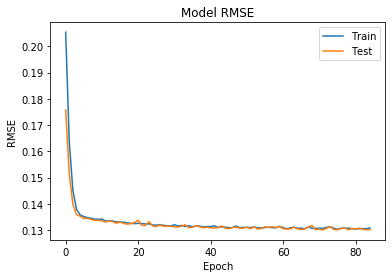

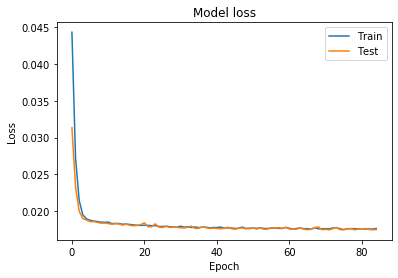

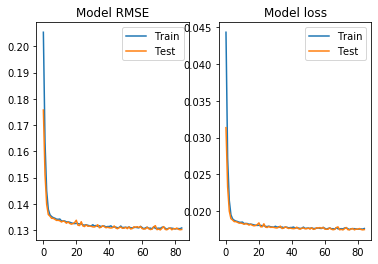

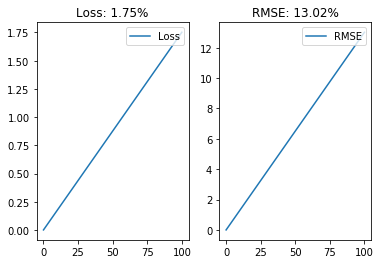

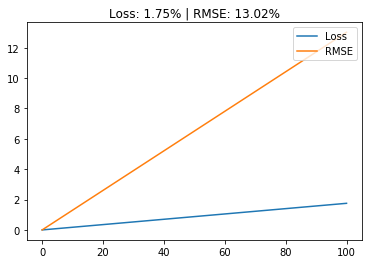

Medium time: 0:00:01.487485


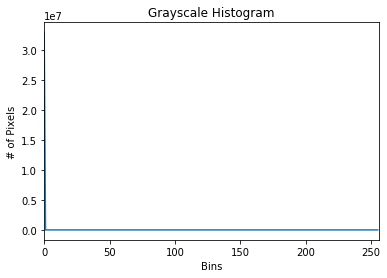

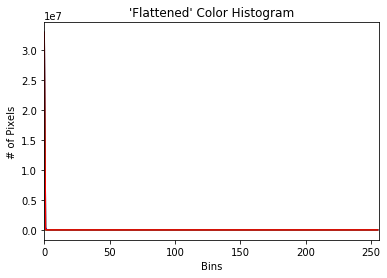

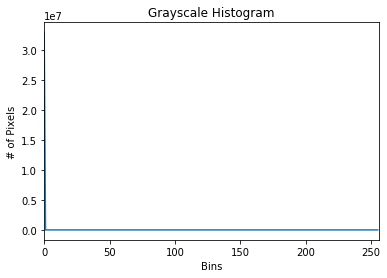

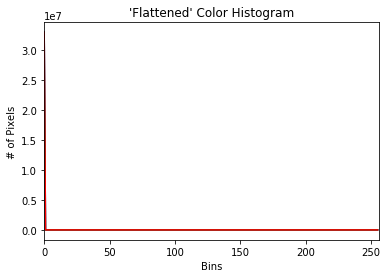

Train on 5501 samples, validate on 5501 samples
Epoch 1/85
5501/5501 [==============================] - 2s 292us/sample - loss: 0.0477 - rmse: 0.2133 - val_loss: 0.0348 - val_rmse: 0.1855
Epoch 2/85
5501/5501 [==============================] - 1s 268us/sample - loss: 0.0318 - rmse: 0.1771 - val_loss: 0.0285 - val_rmse: 0.1675
Epoch 3/85
5501/5501 [==============================] - 1s 270us/sample - loss: 0.0260 - rmse: 0.1596 - val_loss: 0.0243 - val_rmse: 0.1542
Epoch 4/85
5501/5501 [==============================] - 1s 268us/sample - loss: 0.0239 - rmse: 0.1531 - val_loss: 0.0236 - val_rmse: 0.1519
Epoch 5/85
5501/5501 [==============================] - 1s 271us/sample - loss: 0.0235 - rmse: 0.1519 - val_loss: 0.0233 - val_rmse: 0.1512
Epoch 6/85
5501/5501 [==============================] - 1s 269us/sample - loss: 0.0233 - rmse: 0.1512 - val_loss: 0.0231 - val_rmse: 0.1506
Epoch 7/85
5501/5501 [==============================] - 1s 270us/sample - loss: 0.0231 - rmse: 0.1507 - val_loss

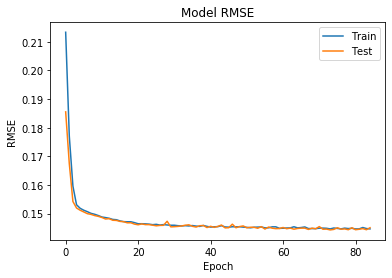

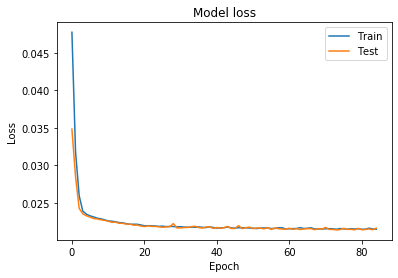

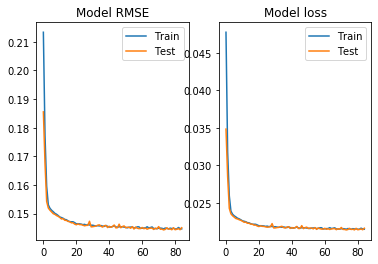

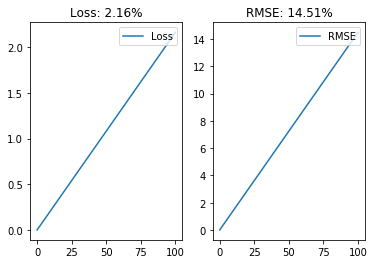

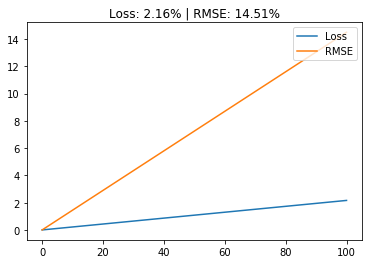

Medium time: 0:00:01.487723


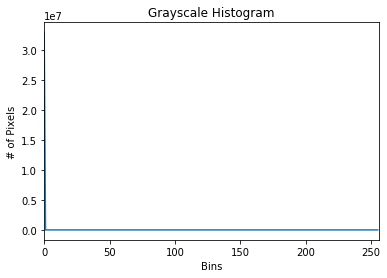

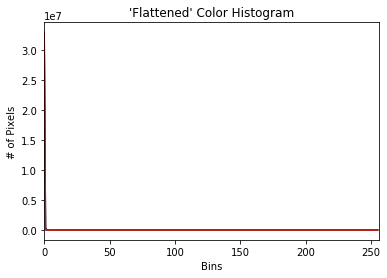

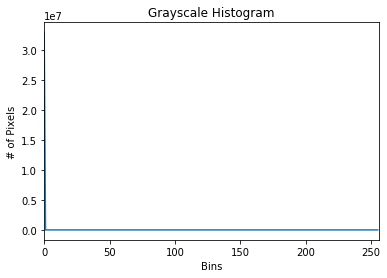

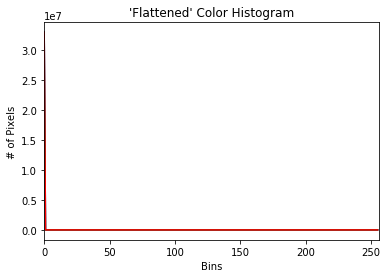

In [0]:
# Get time process

# %lprun -f main main()
main()

Get use of memory of processing

In [13]:
# Get memory process

from deep_autoencoder import main
%mprun -f main main()

ModuleNotFoundError: ignored

Get final informations about memory of system

In [0]:
!lscpu |grep 'Model name'
!lscpu | grep 'Socket(s):'
!lscpu | grep 'Core(s) per socket:'
!lscpu | grep 'Thread(s) per core'
!lscpu | grep "L3 cache"
!lscpu | grep "MHz"
!cat /proc/meminfo | grep 'MemAvailable'
!df -h / | awk '{print $4}'

!df -h
!cat /proc/cpuinfo
!cat /proc/meminfo

In [0]:
from psutil import *

cpu_count()
cpu_stats()
virtual_memory()

Get a cropped size of original image and decoded image to compare

In [0]:
# original = cv2.imread("./results_png/original__17_7606334.png")
# decoded = cv2.imread("./results_png/decoded__17_7606334.png")

# scale_percent = 220

# # Recorte da imagem original e a da imagem decodificada
# cropped_original = original[10:128, 10:128]
# cropped_decoded = decoded[10:128, 10:128]

# cropped_original_width = int(cropped_original.shape[1] * scale_percent / 100)
# cropped_original_height = int(cropped_original.shape[0] * scale_percent / 100)
# cropped_original_dim = (cropped_original_width, cropped_original_height)

# # resize image
# cropped_original_resized = cv2.resize(cropped_original, cropped_original_dim, interpolation = cv2.INTER_AREA) 

# cropped_decoded_width = int(cropped_decoded.shape[1] * scale_percent / 100)
# cropped_decoded_height = int(cropped_decoded.shape[0] * scale_percent / 100)
# cropped_decoded_dim = (cropped_decoded_width, cropped_decoded_height)

# # resize image
# cropped_decoded_resized = cv2.resize(cropped_decoded, cropped_decoded_dim, interpolation = cv2.INTER_AREA) 

# # Original
# cv2_imshow(original)
# cv2_imshow(decoded)

# # Cropped
# cv2_imshow(cropped_original)
# cv2_imshow(cropped_decoded)

# # Resized
# cv2_imshow(cropped_original_resized)
# cv2_imshow(cropped_decoded_resized)


Load model

In [0]:
# model_decoder_save = load_model('./models_h5/decoder__72_9347018.h5')
# model_decoder_save.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# img_encoded = np.load('./data_npy/_72_9347018.npy')
# img_decoded = model_decoder_save.predict(img_encoded)

# with open("./shapes_sizes_json/original__72_9347018.json", "r") as read_file:
#     data = json.load(read_file)

# test_encoder_result = img_decoded.reshape(data['rows'], data['columns'], data['channels'])
# plt.imshow(test_encoder_result)

Generate a file to save informations about memory

In [0]:
# %%writefile deep_autoencoder.py

# # Numpy Matplot cv2
# import numpy as np
# import matplotlib.pyplot as plt
# import matplotlib.image as mpimg
# from google.colab.patches import cv2_imshow
# import cv2

# # Tensorflow and Keras
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.layers import Dense, Input, Dropout
# from tensorflow.keras.models import Model, Sequential, load_model, model_from_yaml, model_from_json
# from tensorflow.keras.applications.inception_v3 import preprocess_input
# from tensorflow.keras.callbacks import *

# # OS libs
# import os
# import json
# import time
# import datetime

# data_png = './data_png'
# data_npy = './data_npy/'
# results_png = './results_png/'
# metrics_png = './metrics_png/'
# models_h5 = './models_h5/'
# models_yml = './models_yml/'
# shapes_sizes_json = './shapes_sizes_json/'

# def plot_metrics_history_subplot(history, name):
#     fig, (ax1, ax2) = plt.subplots(1, 2)

#     # Plot training & validation accuracy values
#     ax1.plot(history.history['acc'])
#     ax1.plot(history.history['val_acc'])
#     ax1.set_title('Model accuracy')
#     ax1.legend(['Train', 'Test'], loc='upper right')

#     # Plot training & validation loss values
#     ax2.plot(history.history['loss'])
#     ax2.plot(history.history['val_loss'])
#     ax2.set_title('Model loss')
#     ax2.legend(['Train', 'Test'], loc='upper right')

#     fig.savefig(metrics_png + 'history_subplot_' + name)

# def plot_metrics_history(history, name):    
#     fig = plt.figure()
    
#     # Plot training & validation accuracy values
#     plt.plot(history.history['acc'])
#     plt.plot(history.history['val_acc'])
#     plt.title('Model accuracy')
#     plt.ylabel('Accuracy')
#     plt.xlabel('Epoch')
#     plt.legend(['Train', 'Test'], loc='upper right')
#     plt.show()
#     fig.savefig(metrics_png + 'history_acc_' + name)

#     fig = plt.figure()

#     # Plot training & validation loss values
#     plt.plot(history.history['loss'])
#     plt.plot(history.history['val_loss'])
#     plt.title('Model loss')
#     plt.ylabel('Loss')
#     plt.xlabel('Epoch')
#     plt.legend(['Train', 'Test'], loc='upper right')
#     plt.show()
#     fig.savefig(metrics_png + 'history_loss_' + name)

# def plot_metrics_evaluate_all(model, name):
#     fig = plt.figure()

#     loss = model[0]
#     accuracy = model[1]

#     plt.plot([0, 100], [0, loss * 100])
#     plt.plot([0, 100], [0, accuracy * 100])
#     plt.title('Loss: %.2f%% | Accuracy: %.2f%%' % ( loss * 100,  accuracy * 100 ))
#     plt.legend(['Loss', 'Accuracy'], loc='upper right')
#     plt.show()
    
#     fig.savefig(metrics_png + 'evaluate_loss_accuracy' + name)

# def plot_metrics_evaluate(model, name):
#     fig, (ax1, ax2) = plt.subplots(1, 2)
#     loss = model[0]
#     accuracy = model[1]

#     ax1.plot([0, 100], [0, loss * 100])
#     ax1.set_title('Loss: %.2f%%' % ( loss * 100 ))
#     ax1.legend(['Loss'], loc='upper right')

#     ax2.plot([0, 100], [0, accuracy * 100])
#     ax2.set_title('Accuracy: %.2f%%' % ( accuracy * 100 ))
#     ax2.legend(['Accuracy'], loc='upper right')
    
#     fig.savefig(metrics_png + 'evaluate_acc_' + name)

# def plot_all(images):
#     fig = plt.figure(figsize=(32, 32))
#     number_rows = int(len(images)/3) + 1
    
#     for index in range(len(images)):
#         a = fig.add_subplot(number_rows, 3, index+1)
#         plt.imshow(images[index])
#         plt.title(f'{index}:{images[index].shape}')
#         a.axis('off')
    
#     fig.savefig(results_png + 'compare_all_images.png')
#     plt.show()

# def save_image(name, image):        
#     mpimg.imsave(results_png + name, image)

# def save_npy(name, image): 
#     name = name[:-4]
#     np.save(data_npy + name + '.npy', image)

# def save_json(name, shape, size): 
#     name = name[:-4]

#     data = {
#         "rows": shape[0],
#         "columns": shape[1],
#         "channels": shape[2],
#         "size": size,
#         "shape": shape
#     }

#     with open(shapes_sizes_json + 'original_' + name + '.json', 'w') as outfile:
#         json.dump(data, outfile)


# class TimingCallback(Callback):
#   def __init__(self):
#     self.times = []
#   def on_epoch_begin(self, epoch, logs={}):
#     self.start_time = time.time()
#   def on_epoch_end(self, epoch, logs={}):
#     self.times.append(time.time() - self.start_time)

# time_callback = TimingCallback()

# class SimpleAutoencoder(object):

#     def __init__(self, input_dim, encoded_dim):    
#         input_layer = Input(shape=(input_dim,))
#         hidden_input = Input(shape=(encoded_dim,))
#         hidden_layer = Dense(encoded_dim, activation='relu')(input_layer)
#         output_layer = Dense(input_dim, activation='sigmoid')(hidden_layer)

#         self.autoencoder = Model(input_layer, output_layer)
#         self.encoder = Model(input_layer, hidden_layer)
#         tmp_decoder_layer = self.autoencoder.layers[-1]
#         self.decoder = Model(hidden_input, tmp_decoder_layer(hidden_input))

#         self.autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

#     def train(self, input_train, input_test, batch_size, epochs):    
#         self.autoencoder.fit(input_train, 
#                                     input_train,
#                                     epochs=epochs,
#                                     batch_size=batch_size,
#                                     shuffle=True,
#                                     validation_data=(
#                                             input_test, 
#                                             input_test),
#                                     callbacks=[time_callback])
        
#     def get_encoded_image(self, image):
#         encoded_image = self.encoder.predict(image)
#         return encoded_image
    
#     def get_decoded_image(self, encoded_imgs):
#         decoded_image = self.decoder.predict(encoded_imgs)
#         return decoded_image

#     def get_evaluate_model(self, train, test):
#         return self.autoencoder.evaluate(train, test)

#     def get_history_model(self):
#         return self.autoencoder.history
    
#     def save_model(self, name):
#         name = name[:-4]
#         self.autoencoder.save(models_h5 + 'autoencoder_' + name + '.h5')
#         self.encoder.save(models_h5 + 'encoder_' + name + '.h5')
#         self.decoder.save(models_h5 + 'decoder_' + name + '.h5')

#     def save_model_to_yml(self, name):
#         name = name[:-4]
#         model_yaml = self.autoencoder.to_yaml()
#         with open(models_yml + 'autoencoder_' + name + '.yaml', 'w') as yaml_file:
#             yaml_file.write(model_yaml)
            
# def main():
#     images = []
#     historic = []
#     results = []
    
#     for img in os.listdir(data_png):
#         try:
#             # Normalização das imagens   
#             img_train = mpimg.imread((os.path.join(data_png, img)))  
#             max_train_value = float(img_train.max())
#             train = img_train.astype('float32') / max_train_value
#             train = train.reshape((len(train), np.prod(train.shape[1:])))
            
#             img_test = mpimg.imread((os.path.join(data_png, img)))
#             max_test_value = float(img_test.max())
#             test = img_test.astype('float32') / max_test_value
#             test = test.reshape((len(test), np.prod(test.shape[1:])))

#             # Envio da imagem para a classe DeepAutoencoder
#             autoencoder = SimpleAutoencoder(train.shape[1], 64)
#             autoencoder.train(train, test, 64, 1500)
            
#             encoded_img = autoencoder.get_encoded_image(test)
#             decoded_img = autoencoder.get_decoded_image(encoded_img)

#             autoencoder_history = autoencoder.get_history_model()
#             autoencoder_evaluate = autoencoder.get_evaluate_model(train, test)
            
#             autoencoder.save_model(img)
#             autoencoder.save_model_to_yml(img)
            
#             plot_metrics_history(autoencoder_history, 'autoencoder' + img)
#             plot_metrics_history_subplot(autoencoder_history, 'autoencoder' + img)
#             plot_metrics_evaluate(autoencoder_evaluate, 'autoencoder' + img)
#             plot_metrics_evaluate_all(autoencoder_evaluate, 'autoencoder' + img)

#             # Dimensões da imagem original
#             image_shape = img_test.shape
#             size_image = img_test.size

#             # Redimensionamento das imagens obtidas
#             original_result = test.reshape(image_shape[0], image_shape[1], image_shape[2])
#             decoded_img_result = decoded_img.reshape(image_shape[0], image_shape[1], image_shape[2])      

#             images.append(original_result)
#             images.append(encoded_img)
#             images.append(decoded_img_result)

#             save_image('original_' + img, original_result)
#             save_image('encoded_' + img, encoded_img)
#             save_image('decoded_' + img, decoded_img_result)
            
#             save_npy(img, encoded_img)
#             save_json(img, image_shape, size_image)
            
#             #Print average of the time for each layer
#             results.append(np.average(time_callback.times))
#             seconds = np.average(time_callback.times)
#             result_time = str(datetime.timedelta(seconds=seconds))
#             print("Medium time:", result_time)  

#         except Exception as e:
#             print(e)
#             pass

#     plot_all(images)
#     return